# Question 1

**Problem 2.2 of Moglen(2015)**

For a fixed specific energy of E* = 0.9 m and in a rectangular channel, vary depth from 0 to 0.9 meters in increments of 0.01 or 0.05 meters and determine the unit discharge, q, at each depth. Plot depth versus q over the range of calculated values. Verify that the maximum specific discharge occurs at y = 2/3E*.

#### Plotting

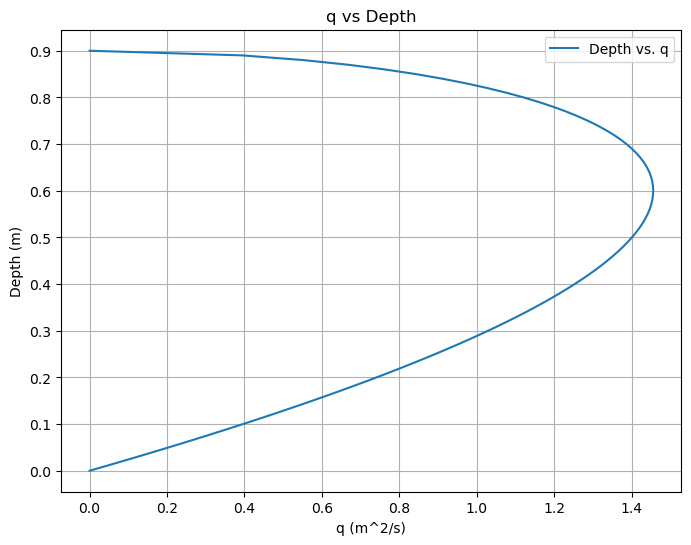

In [5]:
import numpy as np
import matplotlib.pyplot as plt

depth = np.arange(0.0, 0.91, 0.01)

q = []

for x in depth:
    q_squared = 0.9 * 2 * 9.81 * x**2 - 2 * 9.81 * x**3
    if q_squared >= 0:
        q_value = np.sqrt(q_squared)
        q.append(q_value)
    else:
        q_value = 0
        q.append(q_value)

plt.figure(figsize=(8, 6))
plt.plot(q, depth, label='Depth vs. q')
plt.xlabel('q (m^2/s)')
plt.ylabel('Depth (m)')
plt.title('q vs Depth')
plt.grid(True)
plt.legend()
plt.yticks(np.arange(0, 0.91, 0.1))

plt.show()

#### Verifying max specific discharge occurs at y = 2/3E*

$$
y_c = \left( \frac{{q_{max}}^2}{g} \right)^{1/3}
$$

In [6]:
g = 9.81
max_q = max(q)

y_c = ((max_q)**2 / g)**(1/3)

print(y_c)

0.6000000000000001


# Question 2

**Problem 2.4 of Moglen(2015)**

The flow depth upstream of a sluice gate is 0.60 meters. The velocity is 0.9 m/s.

$\>$ $\>$ $\>$ a. What is the minimum allowable gate opening for the upstream flow to be possible as specified?

$\>$ $\>$ $\>$ b. If the gate opening is instantaneously set to 0.15 meters:

$\>$ $\>$ $\>$ $\>$ $\>$ $\>$ i. What is the initial unit discharge, q, under the gate?

$\>$ $\>$ $\>$ $\>$ $\>$ $\>$ ii. What is the final depth at the upstream side of the gate?

#### a. What is the minimum allowable gate opening for the upstream flow to be possible as specified?

assume:
$$
Q_1 = Q_2
$$

$$
E_1 + Z_{b1} = E_2 + Z_{b2} 
$$

$$
E = y + \frac{v^2}{2g}
$$

$$
q = \sqrt{(E-y)*2gy^2}
$$

$$
y^3 + Ey^2 + \frac{q^2}{2g} = 0
$$

In [133]:
import sympy as sp

y, E_o, q_o = sp.symbols('y E_o q_o')

E_o = 0.6 + (0.9**2)/(2*9.81)

q_o = sp.sqrt((E_o - 0.6) * 2 * 9.81 * 0.6**2)

depth_eq = y**3 - E_o * y**2 + (q_o**2)/(2*9.81)

roots = sp.solve(depth_eq, y)

print(E_o)
print("calculated roots =", roots)
print("Minimum allowable gate opening =", 0.18)

0.6412844036697247
calculated roots = [-0.138092616961853 + 0.e-23*I, 0.179377020631578 - 0.e-23*I, 0.6 - 0.e-22*I]
Minimum allowable gate opening = 0.18


#### b. If the gate opening is instantaneously set to 0.15 meters:

####  i. What is the initial unit discharge, q, under the gate?

In [135]:
import sympy as sp

y, E_o, q_o, q_i = sp.symbols('y E_o q_o q_i')

E_o = 0.6 + (0.9**2)/(2*9.81)

y = 0.15

q_i = ((E_o - y) * (2 * 9.81 * y**2))**0.5

print("initial discharge =", round(q_i, 2))

initial discharge = 0.47


#### ii. What is the final depth at the upstream side of the gate?

In [136]:
q = 0.6*0.9
y = (2*0.15)/(-1 + (1+8*(9.81*0.15**3)/(q**2))**0.5)

print("New Depth Upstream =", round(y,2))

New Depth Upstream = 0.79


# Question 3

**Problem 2.5 of Moglen(2015)**

Water is flowing at a velocity of 2.6 ft/s and a depth of 1.1 feet in a rectangular channel.

$\>$ $\>$ $\>$ a. The flow encounters a smooth upward step of 0.2 feet.

$\>$ $\>$ $\>$ $\>$ $\>$ $\>$ i. What is the depth of flow on the step?

$\>$ $\>$ $\>$ $\>$ $\>$ $\>$ ii. What is the absolute change in water level compared to the channel bottom before the step?

$\>$ $\>$ $\>$ $\>$ $\>$ $\>$ iii. What are the Froude numbers upstream and at the step?

$\>$ $\>$ $\>$ b. Find the maximum allowable size 

#### a. The flow encounters a smooth upward step of 0.2 feet.

#### i. What is the depth of flow on the step?

In [137]:
import sympy as sp

y, E_o, q_o, E_f = sp.symbols('y E_o q_o E_f')

E_o = 1.1 + (2.6**2)/(2*32.1741)

E_f = E_o - 0.2

q_o = sp.sqrt((E_o - 1.1) * 2 * 32.1741 * 1.1**2)

depth_eq = y**3 - E_f * y**2 + (q_o**2)/(2*32.1741)

roots = sp.solve(depth_eq, y)

print("calculated roots =", roots)
print("Depth above step (ft) =", 0.81)

calculated roots = [-0.310808359743467 + 0.e-23*I, 0.503359809193457 + 0.e-23*I, 0.812501994158381 - 0.e-23*I]
Depth above step (ft) = 0.81


#### ii. What is the absolute change in water level compared to the channel bottom before the step?

In [138]:
change = 1.1 - 0.81

print("absolute change in level over step (ft) =", round(change, 2))

absolute change in level over step (ft) = 0.29


#### iii. What are the Froude numbers upstream and at the step?

In [139]:
F_u = (2.6)/(32.1741*1.1)**0.5

v = 2.86/0.81

F_d = (v/(32.1741*0.81)**0.5)


print("Froude Number Up Stream =", round(F_u, 3))
print("Froude Number Down Stream =", round(F_d, 3))

Froude Number Up Stream = 0.437
Froude Number Down Stream = 0.692


#### b. Find the maximum allowable size

In [140]:
q = 2.6*1.1
g = 32.1741

y = ((q**2)/g)**(1/3)

E_int = 1.1 + (2.6**2)/(2*32.1741)
i = E_int
E_crit = (3/2) * y
f = E_crit

delta = i - f 

print("Maximum Allowable Depth of Step (ft)= ", round(delta, 3))

Maximum Allowable Depth of Step (ft)=  0.255


# Question 4

**Problem 2.7 of Moglen(2015)**

consider a system with a discharge of 9 m3/s. The channel is rectangular. The width at location 1 is w1 = 4.5 m. A constriction is encountered at location 2 downstream such that the width w2 = 3m. The depth of flow y2 at downstream location 2 is 0.7 meters.

$\>$ $\>$ $\>$ a. Determine the specific discharges at locations 1 and 2.

$\>$ $\>$ $\>$ b. Determine the downstream specific energy, E2.

$\>$ $\>$ $\>$ c. Determine the downstream Froude number, Fr,2.

$\>$ $\>$ $\>$ d. Determine the upstream specific energy, E1.

$\>$ $\>$ $\>$ e. Determine the upstream depth, y1.

$\>$ $\>$ $\>$ f. Determine the upstream Froude number, Fr,1.

$\>$ $\>$ $\>$ g. Determine the absolute change in the water surface from location 1 to location 2.

$\>$ $\>$ $\>$ h. Sketch the transition of the system from location 1 through the flow constriction to location 2 on an E-y diagram.

#### a. Determine the specific discharges at locations 1 and 2

Assuming steady, frictionless, horizontal flow

$$
Q_1 = Q_2 
$$

$$
q_1 \cdot w_1 = q_2 \cdot w_2
$$

$$
q = Q/w
$$

In [141]:
import sympy as sp

g, q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, F_1, F_2 = sp.symbols('g q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 F_1 F_2')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81

Q_2 = Q_1
q_2 = Q_2 / w_2
q_1 = (Q_2)/w_1


print("Specific Discharge Upstream =", round(q_1, 2))
print("Specific Discharge Downstream =", round(q_2, 2))

Specific Discharge Upstream = 2.0
Specific Discharge Downstream = 3.0


#### b. Determine the downstream specific energy, E2.

$$
E_2 = y + \frac{q^2}{2 \cdot g \cdot y^2}
$$

In [142]:
import sympy as sp

q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, F_1, F_2, w_d = sp.symbols('q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 F_1 F_2 w_d')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81
Q_2 = Q_1
Q_2 = Q_1
q_2 = Q_2 / w_2
q_1 = (Q_2)/w_1
w_d = w_1 - w_2

E_2 = y_2 + ((q_2)**2)/(2*g*y_2**2)

print("Specific Energy at E2 =", round(E_2, 2))

Specific Energy at E2 = 1.64


#### c. Determine the downstream Froude number, Fr,2

$$
F = \frac{v}{\sqrt{g \cdot y}} = \frac{q}{\sqrt{g \cdot y^3}}
$$

In [143]:
import sympy as sp

q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, v_1, v_2, F_1, F_2 = sp.symbols('q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 v_1 v_2 F_1 F_2')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81
Q_2 = Q_1
Q_2 = Q_1
q_2 = Q_2 / w_2
q_1 = (Q_2)/w_1
E_2 = y_2 + ((q_2)**2)/(2*g*y_2**2)

v_2 =  q_2 / y_2
F_2 = v_2 / ((g*y_2)**0.5)

print("Froude Number at y2=", round(F_2, 2))

Froude Number at y2= 1.64


####  d. Determine the upstream specific energy, E1.

$$
E_1 = E_2
$$

In [144]:
import sympy as sp

q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, v_1, v_2, F_1, F_2 = sp.symbols('q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 v_1 v_2 F_1 F_2')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81
Q_2 = Q_1
q_2 = Q_2 / w_2
q_1 = (Q_1)/w_1
E_2 = y_2 + ((q_2)**2)/(2*g*y_2**2)
v_2 =  q_2 / y_2
F_2 = q_2 / ((g*y_2**3)**0.5)
E_1 = E_2

print("Upstream Specific Energy =", round(E_1, 2))

Upstream Specific Energy = 1.64


#### e. Determine the upstream depth, y1

$$
0 = {y_1}^3 - E_1 \cdot {y_1}^2 + \frac{{q_1}^2}{2g}
$$

In [145]:
import sympy as sp
from scipy.optimize import fsolve
import numpy as np
import math

q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, v_1, v_2, F_1, F_2 = sp.symbols('q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 v_1 v_2 F_1 F_2')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81
Q_2 = Q_1
q_2 = Q_2 / w_2
E_2 = y_2 + ((q_2)**2)/(2*g*y_2**2)
v_2 =  Q_2 / (w_2 * y_2)
F_2 = v_2 / (g*y_2)**0.5
q_1 = Q_1 /  w_1
E_1 = E_2


depth_eq = y_1**3 - E_1 * y_1**2 + (q_1**2)/(2*g)
roots = sp.solve(depth_eq, y_1)

y_c = ((q_1**2)/g)**(1/3)
#print(y_c)

print(roots)
print("Upstream Depth at y1 (m) =", 0.41)

[-0.322617948590929 - 0.e-23*I, 0.407317864364092 + 0.e-20*I, 1.55145436245189 - 0.e-21*I]
Upstream Depth at y1 (m) = 0.41


#### f. Determine the upstream Froude number, Fr,1.

$$
F_{r1} = \frac{\frac{v_1}{y_1}}{\sqrt{g \cdot y_1}}
$$

In [146]:
import sympy as sp

q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, v_1, v_2, F_1, F_2 = sp.symbols('q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 v_1 v_2 F_1 F_2')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81
Q_2 = Q_1
q_2 = Q_2 / (w_2 * y_2)
E_2 = y_2 + ((q_2)**2)/(2*g*y_2**2)
v_2 =  Q_2 / (w_2 * y_2)
F_2 = v_2 / (g*y_2)**0.5
y_1 = 0.407317864364092
q_1 = Q_1 / w_1
E_1 = y_1 + (q_1**2)/(2*g*y_1**2)

v_1 =  q_1 / y_1
F_1 = v_1 / (g*y_1)**0.5

print("Froude Number at y1 (m)=", round(F_1, 2))

Froude Number at y1 (m)= 2.46


#### g. Determine the absolute change in the water surface from location 1 to location 2.

$$
change = y_2 - y_1
$$

In [147]:
import sympy as sp

q_1, q_2, y_1, y_2, Q_1, Q_2, w_1, w_2, E_1, E_2, v_1, v_2, F_1, F_2 = sp.symbols('q_1 q_2 y_1 y_2 Q_1 Q_2 w_1 w_2 E_1 E_2 v_1 v_2 F_1 F_2')

Q_1 = 9 
w_1 = 4.5
w_2 = 3
y_2 = 0.7
g = 9.81
Q_2 = Q_1
q_2 = Q_2 / (w_2 * y_2)
E_2 = y_2 + ((q_2)**2)/(2*g*y_2**2)
v_2 =  Q_2 / (w_2 * y_2)
F_2 = v_2 / (g*y_2)**0.5
y_1 = Q_1 / (q_2 *w_1)
q_1 = Q_1 / (y_1 * w_1)
E_1 = y_1 + (q_1**2)/(2*g*y_1**2)
v_1 =  Q_1 / (w_1 * y_1)
F_1 = v_1 / (g*y_1)**0.5

delta = y_2 - y_1

print("Absolute Change in Water Surface (m)=", round(delta, 2))

Absolute Change in Water Surface (m)= 0.23


#### h. Sketch the transition of the system from location 1 through the flow constriction to location 2 on an E-y diagram.

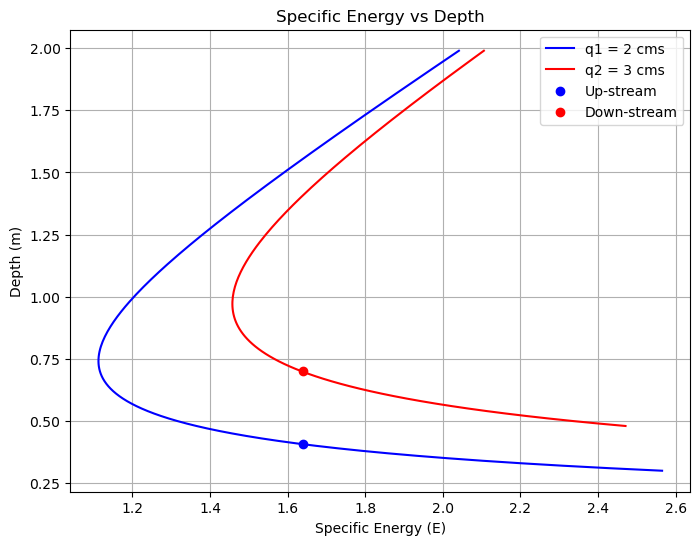

In [148]:
import numpy as np
import matplotlib.pyplot as plt

int_depth = np.arange(0.3, 2, 0.01)
final_depth = np.arange(0.48, 2, 0.01)

E1 = []
E2 = []

for x in int_depth:
    E1_values = x + (2**2)/(2*9.81*x**2)
    E1.append(E1_values)


for x in final_depth:
    E2_values = x + (3**2)/(2*9.81*x**2)
    E2.append(E2_values)

plt.figure(figsize=(8, 6))
plt.plot(E1, int_depth, color = "blue", label = "q1 = 2 cms")
plt.plot(E2, final_depth, color = "red", label = "q2 = 3 cms")
plt.scatter(1.64, 0.4073, color = "blue", marker = "o", label = "Up-stream")
plt.scatter(1.64, 0.7, color = "red", marker = "o", label = "Down-stream")
plt.xlabel('Specific Energy (E)')
plt.ylabel('Depth (m)')
plt.title('Specific Energy vs Depth')
plt.grid(True)
plt.legend()


plt.show()

# Question 5

Derive the form of the Froude number for a non-rectangular cross section using the following definition of the specific energy:

$$
E = y + \frac{Q^2}{2 \cdot g \cdot A^2}
$$

$$
E = y + \frac{v^2}{2g} = y + \frac{Q^2}{2 \cdot g \cdot A^2}
$$

$\downarrow$ A = A(y)

$\downarrow$ f(E,y,Q) = 0

$\downarrow$ Q = constant $\rightarrow$ E = f(y,Q)

$\downarrow$ E = constant $\rightarrow$ E = f(y,Q)

$\downarrow$ At critical depth $\rightarrow$ specific energy = minimum

$$
\frac{\partial E}{\partial y} = 1 - {F_r}^2
$$

$\downarrow$

$$
\frac{\partial E}{\partial y} = 1 - \frac{Q^2}{gA^3} \cdot \frac{\partial A}{\partial y} = 0
$$

$\downarrow$

$$
1 - \frac{Q^2}{gA^3} \cdot \frac{\partial A}{\partial y} = 1 - {F_r}^2
$$

$\downarrow$ $\frac{\partial A}{\partial y} = \frac{ B \partial y}{\partial y} = B$ (topwidth)

$$
1 - \frac{Q^2 B}{gA^3} = 1 - {F_r}^2
$$

$\downarrow$ 

$$
\frac{Q^2 B}{gA^3} = {F_r}^2
$$

$\downarrow$ 

$$
\frac{V^2 \cdot A^2 \cdot B}{gA^3} = {F_r}^2
$$

$\downarrow$ 

$$
\sqrt{\frac{V^2 \cdot B}{gA}} = \sqrt{{F_r}^2}
$$

$\downarrow$ 

$$
\boxed{
\frac{V}{\sqrt{g \frac{A}{B}}} = {F_r}
}
$$

# Question 6

A USGS study of natural channel shapes in the western United States reports and average ratio of the maximum depth to hydraulic depth of $y/Dh = 1.55$. Calculate y/Dh for a (1) rectangular, (2) triangular, and (3) parabolic channel. Based off of your ratios, how would you describe the average cross sectional shape of natural rivers (roughly)? Note that for a parabolic channel, the properties of area, A, and wetted perimeter, P , are:

$$
A = \frac{2}{3} Ty
$$

$$and$$ 

$$
P = \left(T + \frac{8}{3} \cdot \frac{y^2}{T} \right)^*
$$

where y is the depth, and T is the top width. ∗this is approximately true for 4y/T < 1.



$$
Hydraulic Depth (D) = \frac{A}{T}
$$


#### Rectangular

$$
D = \frac{A}{T}
$$

$$
A = b \cdot y
$$

$$
T = b
$$

$$
D = \frac{b\cdot y}{b}
$$

$$
D = y
$$

In [149]:
y = 4.5
Hydraulic_depth = y 
max_depth = y

x = max_depth / Hydraulic_depth

print("y/Dh (rectangular) =", x)

y/Dh (rectangular) = 1.0


#### Triangular

$$
D = \frac{A}{T}
$$

$$
A = z \cdot y^2
$$

$$
T = 2 \cdot z \cdot y
$$

$$
D = \frac{z \cdot y^2}{2 \cdot z \cdot y}
$$

$$
D = \frac{y}{2}
$$

In [150]:
y = 4.5
Hydraulic_depth = 0.5*y 
max_depth = y

x = max_depth / Hydraulic_depth

print("y/Dh (triangular)) =", x)

y/Dh (triangular)) = 2.0


#### Parabolic

$$
Hydraulic Depth (D) = \frac{A}{T}
$$

$$
A = \frac{2}{3} Ty
$$

$$
T = T
$$

$$
D = \frac{\frac{2}{3} \cdot T \cdot y}{T}
$$

$$
D = \frac{2}{3} \cdot y
$$

In [151]:
y = 4.5
Hydraulic_depth = ((2/3)*y)
max_depth = y

x = max_depth / Hydraulic_depth

print("y/Dh (parabolic) =", x)

y/Dh (parabolic) = 1.5


#### Describe average cross sectional shape of rivers

Based on the USGS's reported y/Dh of 1.55, it can be infered that most natural channels most closely resemble a parabolic shape. Rectangular channel geometries have a relative y/Dh of 1, underestimating y/Dh for natural channels. While triangular channel geometries have a y/Dh of 2 which would serve as an over esitimate for natural channels. 

# Question 7

Write a snippet of code to calculate the critical flow depth in a circular and trapezoidal channel. Use figure 2.24 to check your answer. For the trapezoidal channel, make the test using $Q = 9$, $b = 1.5$, and $m = 2$. For the circular cross section, make the test using $Q = 9$ and a diameter of $D = 1.5$. Include a print out of the code

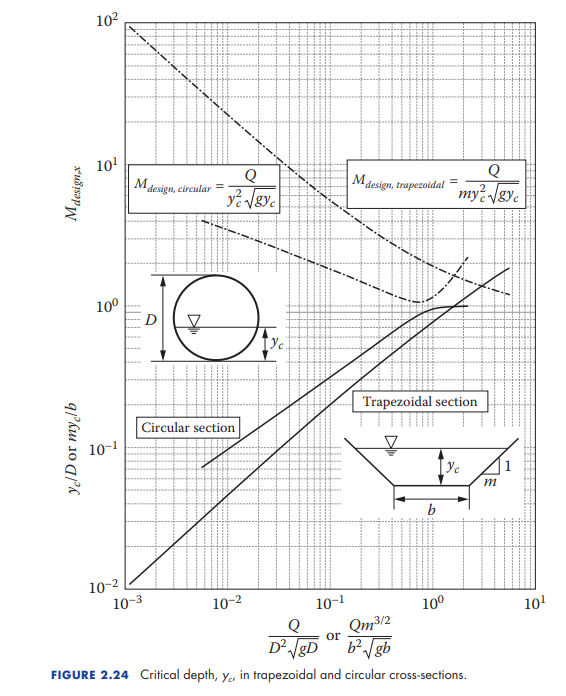

#### Circular Channel

$$
\frac{Q}{D^2 \sqrt{gD}} = y_c
$$

In [152]:
Q = 9
g = 9.81
D = 1.5

y = (Q)/((D**2)*(g*D)**0.5)

print("Critical Depth = ", round(y, 2))

Critical Depth =  1.04


#### Trapizoidal Channel

$$
\frac{Qm^{3/2}}{b^2 \sqrt{gb}} = y_c
$$

In [153]:
Q = 9
b = 1.5
m = 2
g = 9.81

y = (Q*m**(3/2))/((b**2)*(g*b)**0.5)

print("Critical Depth = ", round(y, 2))

Critical Depth =  2.95


# Question 8

**(Graduate Students Only) Problem 2.11 of Moglen (2015).**

A trapezoidal channel has a bottom width of 20 feet, has side slopes of 2H:1V, and carries a flow of 750 ft3/s.

$\>$ $\>$ $\>$ a. Find the flow depth at the head of a steep slope.

$\>$ $\>$ $\>$ b. If there is a short but smooth transition to a rectangular section 20 feet wide just before the head of the steep slope, find the depth at the upstream and $\>$ $\>$ $\>$$\>$ $\>$ $\>$ downstream ends of the transition, assuming that the specific energy remains unchanged through the transition.

#### a. Find the flow depth at the head of a steep slope.

$$
E = \frac{Q^2}{2gA^2} + y
$$

$$
A = (b+m \cdot y) \cdot y
$$

$$
B = b + 2my
$$

$$
F_r = \frac{Q}{\sqrt{g \cdot \frac{A^3}{B}}}
$$

**Assuming at critical depth therefore Fr = 1**

In [3]:
import sympy as sp

y = sp.symbols('y')

equation = ((750**2) * (20 + 4 * y)) / ((((20 + 2 * y) * y)**3) * 32.1741) - 1

roots = sp.solve(equation, y)

results = [sol.evalf() for sol in roots if sol.is_real and sol > 0]

for result in results:
    print("Depth (ft) =", round(result, 2))


Depth (ft) = 3.15


#### b. If there is a short but smooth transition to a rectangular section 20 feet wide just before the head of the steep slope, find the depth at the upstream and downstream ends of the transition, assuming that the specific energy remains unchanged through the transition.

$$
E_1 = E_2
$$

$$
E_1 =  \frac{Q^2}{2gA^2} + y = 
E_2 = \frac{v^2}{2g} + y
$$

$$
\frac{Q^2}{2gA^2} + y_1 = \frac{v^2}{2g} + y_2
$$

$$
0 = y^3 - Ey^2 + \frac{q^2}{2g}
$$

In [158]:
import sympy as sp
import math

l = sp.symbols('l')

d = 3.15
Q = 750
b = 20
m = 2
g = 32.17

A = (b + d * m)*d
B = b + 2 * m * d

E_1 = (Q**2)/(2*g*A**2) + d

v = math.sqrt(g* (A/B))

q = v*3.15

depth_eq = l**3 - E_1 * l**2 + (q**2)/(2*32.1741)

roots = sp.solve(depth_eq, l)

print("calculated roots =", roots)
print("Up Stream (ft) =", 3.15)
print("Down Stream (ft) =", 2.74)


calculated roots = [-1.46332196844481 + 0.e-23*I, 2.72034705325126 + 0.e-22*I, 3.1667972683533 - 0.e-22*I]
Up Stream (ft) = 3.15
Down Stream (ft) = 2.74
